In [1]:
from urllib.request import urlopen, Request
from urllib.request import urlopen
from matplotlib import pyplot as plt
import math
import datetime
from time import sleep
from bs4 import BeautifulSoup
import copy
import json
import sys
import csv
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)



C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Density of data

In [2]:
dates = []
values =[]
start_date = "03/20/2019"
date = datetime.datetime.strptime(start_date, "%m/%d/%Y")

for i in range(1,200):
    date = date + datetime.timedelta(days=1)
    dates.append(str(date.strftime('%m/%d/%Y')))
    values.append(float(0.0))
    
dictionary = dict(zip(dates, values))
print(dictionary)

{'03/21/2019': 0.0, '03/22/2019': 0.0, '03/23/2019': 0.0, '03/24/2019': 0.0, '03/25/2019': 0.0, '03/26/2019': 0.0, '03/27/2019': 0.0, '03/28/2019': 0.0, '03/29/2019': 0.0, '03/30/2019': 0.0, '03/31/2019': 0.0, '04/01/2019': 0.0, '04/02/2019': 0.0, '04/03/2019': 0.0, '04/04/2019': 0.0, '04/05/2019': 0.0, '04/06/2019': 0.0, '04/07/2019': 0.0, '04/08/2019': 0.0, '04/09/2019': 0.0, '04/10/2019': 0.0, '04/11/2019': 0.0, '04/12/2019': 0.0, '04/13/2019': 0.0, '04/14/2019': 0.0, '04/15/2019': 0.0, '04/16/2019': 0.0, '04/17/2019': 0.0, '04/18/2019': 0.0, '04/19/2019': 0.0, '04/20/2019': 0.0, '04/21/2019': 0.0, '04/22/2019': 0.0, '04/23/2019': 0.0, '04/24/2019': 0.0, '04/25/2019': 0.0, '04/26/2019': 0.0, '04/27/2019': 0.0, '04/28/2019': 0.0, '04/29/2019': 0.0, '04/30/2019': 0.0, '05/01/2019': 0.0, '05/02/2019': 0.0, '05/03/2019': 0.0, '05/04/2019': 0.0, '05/05/2019': 0.0, '05/06/2019': 0.0, '05/07/2019': 0.0, '05/08/2019': 0.0, '05/09/2019': 0.0, '05/10/2019': 0.0, '05/11/2019': 0.0, '05/12/2019

In [3]:
def AddToDictionary(dict, file):
    
    df = pd.read_csv(file)
    for index, row in df.iterrows():
        index = (row.date.split(' ')[0])
        index = datetime.datetime.strptime(index, "%Y-%m-%d")
        index = str(index.strftime('%m/%d/%Y'))
        try:
            dict[index] = int(dictionary[index])+1
        except:
            continue
    return dict

In [4]:
dictionary = AddToDictionary(dictionary, 'data01.csv')
dictionary = AddToDictionary(dictionary, 'data02.csv')
dictionary = AddToDictionary(dictionary, 'data03.csv')
dictionary = AddToDictionary(dictionary, 'data04.csv')

In [5]:
print(dictionary)

{'03/21/2019': 5, '03/22/2019': 4, '03/23/2019': 3, '03/24/2019': 3, '03/25/2019': 5, '03/26/2019': 3, '03/27/2019': 9, '03/28/2019': 8, '03/29/2019': 12, '03/30/2019': 6, '03/31/2019': 5, '04/01/2019': 8, '04/02/2019': 22, '04/03/2019': 19, '04/04/2019': 18, '04/05/2019': 16, '04/06/2019': 9, '04/07/2019': 7, '04/08/2019': 8, '04/09/2019': 18, '04/10/2019': 20, '04/11/2019': 10, '04/12/2019': 18, '04/13/2019': 6, '04/14/2019': 13, '04/15/2019': 12, '04/16/2019': 13, '04/17/2019': 13, '04/18/2019': 14, '04/19/2019': 15, '04/20/2019': 8, '04/21/2019': 11, '04/22/2019': 7, '04/23/2019': 18, '04/24/2019': 16, '04/25/2019': 12, '04/26/2019': 13, '04/27/2019': 10, '04/28/2019': 7, '04/29/2019': 13, '04/30/2019': 13, '05/01/2019': 15, '05/02/2019': 16, '05/03/2019': 19, '05/04/2019': 13, '05/05/2019': 7, '05/06/2019': 17, '05/07/2019': 17, '05/08/2019': 19, '05/09/2019': 22, '05/10/2019': 18, '05/11/2019': 10, '05/12/2019': 12, '05/13/2019': 17, '05/14/2019': 22, '05/15/2019': 17, '05/16/201

AttributeError: 'BarContainer' object has no attribute 'get_xticklabels'

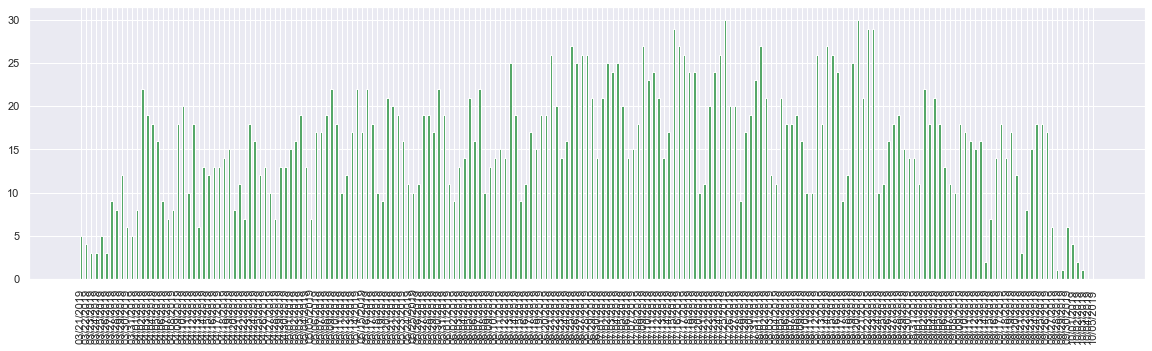

In [6]:
#df = pd.DataFrame.from_dict(dictionary)

plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')

g = plt.bar(dictionary.keys(), dictionary.values(), 0.5, color='g')
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

In [7]:
pd = pd.read_csv("../dataProcessing/twitter_data/news_with_sentiment.csv")

In [9]:
ad =pd.DataFrame.from_dict(dictionary,orient='index')
ad.head()
ad.columns = ['count']
ad['date'] = ad.index
ad = ad.reset_index(drop=True)
ad = ad.sort_values(by='date')


AttributeError: 'DataFrame' object has no attribute 'DataFrame'

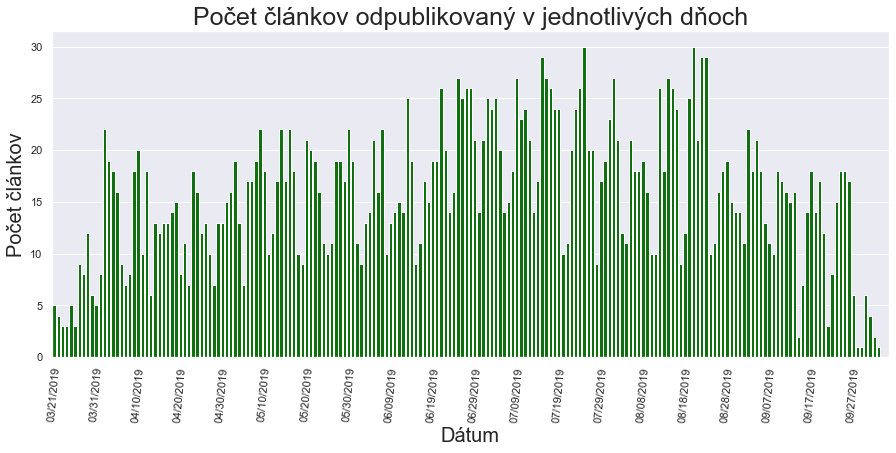

In [69]:
plt.figure(figsize=(15,6))
g = sns.barplot(x = ad.date, y = ad['count'], color='green')

g.set_title('Počet článkov odpublikovaný v jednotlivých dňoch', fontsize = 25)
g.set_ylabel("Počet článkov", fontsize = 20) 
g.set_xlabel("Dátum",fontsize = 20) 
plt.xticks(rotation='85')
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Text(0.5, 0, 'Počet článkov')

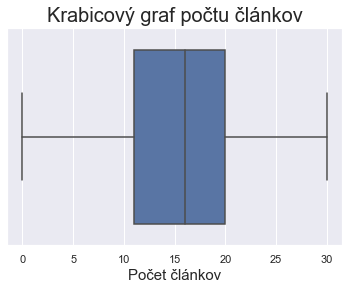

In [71]:
ax = sns.boxplot(x=(ad['count']))
ax.set_title('Krabicový graf počtu článkov', fontsize = 20)

ax.set_xlabel("Počet článkov", fontsize = 15)